<a href="https://colab.research.google.com/github/maulshreegarg/shortform-content-analysis/blob/main/xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
df = pd.read_excel("/content/final_combined_data.xlsx")
fields_to_fill = ["viewCountYT", "likesYT", "commentsCountYT", "numberOfSubscribers"]
df[fields_to_fill] = df[fields_to_fill].fillna(0)
print(df)

    channelLocation       channelName  channelTotalVideos  channelTotalViews  \
0     United States  Little Remy Food               405.0          451819942   
1     United States  Little Remy Food               405.0          451819942   
2     United States  Little Remy Food               405.0          451819942   
3     United States  Little Remy Food               405.0          451819942   
4     United States  Little Remy Food               405.0          451819942   
..              ...               ...                 ...                ...   
426               0        Omar Agamy              1371.0         2758967280   
427               0        Omar Agamy              1371.0         2758967280   
428               0        Omar Agamy              1371.0         2758967280   
429               0        Omar Agamy              1371.0         2758967280   
430               0        Omar Agamy              1371.0         2758967280   

     commentsCountYT                   

In [82]:
df['engagement_rate'] = (df['likesYT'] + df['commentsCountYT']) / df['viewCountYT']
df['virality_score'] = (df['viewCountYT'] / df['numberOfSubscribers']) * df['engagement_rate']

In [83]:
print("📋 Columns in Excel sheet:")
print(df.columns.tolist())


📋 Columns in Excel sheet:
['channelLocation', 'channelName', 'channelTotalVideos', 'channelTotalViews', 'commentsCountYT', 'date', 'duration', 'likesYT', 'numberOfSubscribers', 'viewCountYT', 'title', 'instaviews', 'instalikes', 'instacom', 'type', 'engagement_rate', 'virality_score']


In [84]:
print(df.head())

  channelLocation       channelName  channelTotalVideos  channelTotalViews  \
0   United States  Little Remy Food               405.0          451819942   
1   United States  Little Remy Food               405.0          451819942   
2   United States  Little Remy Food               405.0          451819942   
3   United States  Little Remy Food               405.0          451819942   
4   United States  Little Remy Food               405.0          451819942   

   commentsCountYT                       date  duration  likesYT  \
0              286  2024-03-01T13:25:39-08:00  00:00:23   151000   
1              195  2024-02-25T13:48:26-08:00  00:00:20   100000   
2              217  2024-02-29T13:08:10-08:00  00:00:23    77000   
3              134  2024-02-27T13:55:26-08:00  00:00:27    17000   
4              164  2024-03-04T13:22:30-08:00  00:00:27    46000   

   numberOfSubscribers  viewCountYT  \
0               519000      2739734   
1               519000      1418273   
2    

In [85]:
df["engagement_rate"] = df["engagement_rate"].fillna(0)
df["virality_score"] = df["virality_score"].fillna(0)

In [86]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

In [87]:
print(df.head())

  channelLocation       channelName  channelTotalVideos  channelTotalViews  \
0   United States  Little Remy Food               405.0          451819942   
1   United States  Little Remy Food               405.0          451819942   
2   United States  Little Remy Food               405.0          451819942   
3   United States  Little Remy Food               405.0          451819942   
4   United States  Little Remy Food               405.0          451819942   

   commentsCountYT                       date  duration  likesYT  \
0              286  2024-03-01T13:25:39-08:00  00:00:23   151000   
1              195  2024-02-25T13:48:26-08:00  00:00:20   100000   
2              217  2024-02-29T13:08:10-08:00  00:00:23    77000   
3              134  2024-02-27T13:55:26-08:00  00:00:27    17000   
4              164  2024-03-04T13:22:30-08:00  00:00:27    46000   

   numberOfSubscribers  viewCountYT  \
0               519000      2739734   
1               519000      1418273   
2    

In [90]:
X = df_encoded.drop(columns=['viewCountYT', 'virality_score', 'title', 'date'])  # drop high-cardinality or leakage features
y = df_encoded['virality_score']


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
#xgboost
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [93]:
y_pred = model.predict(X_test)

In [94]:
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [95]:
print("RMSE:", rmse)
#t means that approximately 91.5% of the variance in your target variable
print("R² Score:", r2)
#A value of ~0.002 seems extremely low, which is typically very good.

RMSE: 0.0019988352810702734
R² Score: 0.914547700888653


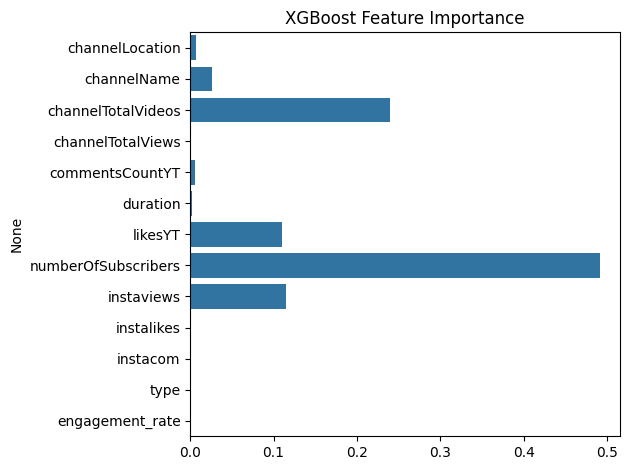

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_importance = model.feature_importances_
features = X.columns
sns.barplot(x=feature_importance, y=features)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()


In [115]:
import pandas as pd
import numpy as np
import xgboost as xgb
import joblib
print("Loading models (simulation)...")
try:
    print("WARNING: Using placeholder models and feature names!")
    expected_feature_names = [
        'duration',
        'type_food',
        'type_educational',
        'type_news',
        'title_length',
        'keyword_present'
    ]
    num_features = len(expected_feature_names)
    model_views = xgb.XGBRegressor(random_state=42)
    model_likes = xgb.XGBRegressor(random_state=42)
    model_comments = xgb.XGBRegressor(random_state=42)
    dummy_X = pd.DataFrame(np.random.rand(5, num_features), columns=expected_feature_names)
    dummy_y_views = np.random.rand(5) * 10000
    dummy_y_likes = np.random.rand(5) * 100
    dummy_y_comments = np.random.rand(5) * 10
    model_views.fit(dummy_X, dummy_y_views)
    model_likes.fit(dummy_X, dummy_y_likes)
    model_comments.fit(dummy_X, dummy_y_comments)
    print(f"Models loaded. Expecting {len(expected_feature_names)} features:")
    print(expected_feature_names)
except FileNotFoundError:
    print("Error: Could not load model files or feature names.")
    print("Please ensure views_model.joblib, likes_model.joblib, comments_model.joblib, and feature_names.joblib exist.")
    exit()
except Exception as e:
    print(f"An error occurred during loading: {e}")
    exit()
def predict_metrics_from_features(numerical_feature_dict, expected_cols, num_subscribers):
    print("\nPreparing feature vector...")
    input_df = pd.DataFrame([numerical_feature_dict])
    final_input_df = input_df.reindex(columns=expected_cols, fill_value=0)
    print("Feature vector aligned for prediction:")
    print(final_input_df)
    if final_input_df.isnull().values.any():
        print("WARNING: Missing values detected in input features after alignment!")
    print("\nPredicting base metrics...")
    try:
        predicted_views = model_views.predict(final_input_df)[0]
        predicted_likes = model_likes.predict(final_input_df)[0]
        predicted_comments = model_comments.predict(final_input_df)[0]
        predicted_reach = max(0, round(predicted_views))
        predicted_likes = max(0, round(predicted_likes))
        predicted_comments = max(0, round(predicted_comments))
        print("Calculating engagement and virality...")
        if predicted_reach > 0:
            engagement_rate = (predicted_likes + predicted_comments) / predicted_reach
        else:
            engagement_rate = 0.0
        if num_subscribers > 0:
            virality_score = (predicted_reach / num_subscribers) * engagement_rate
        else:
            virality_score = 0.0
        print("Prediction and calculation complete.")
        return {
            'predicted_reach': predicted_reach,
            'predicted_likes': predicted_likes,
            'predicted_comments': predicted_comments,
            'calculated_engagement_rate': engagement_rate,
            'calculated_virality_score': virality_score
        }
    except Exception as e:
        print(f"An error occurred during prediction or calculation: {e}")
        return None
if __name__ == "__main__":
    subscribers_example_1 = 50000
    input_features_1 = {
        'duration': 40,
        'type_food': 1,
        'type_educational': 0,
        'type_news': 0,
        'title_length': 66,
        'keyword_present': 3
    }
    print("\n--- Input Features 1 ---")
    print(input_features_1)
    print(f"Assumed Subscribers: {subscribers_example_1}")
    print("-------------------------")
    predictions_1 = predict_metrics_from_features(input_features_1, expected_feature_names, subscribers_example_1)
    if predictions_1:
        print("\n--- Prediction Results 1 ---")
        print(f"Predicted Reach (Views): {predictions_1['predicted_reach']}")
        print(f"Predicted Likes: {predictions_1['predicted_likes']}")
        print(f"Predicted Comments: {predictions_1['predicted_comments']}")
        print(f"Calculated Engagement Rate: {predictions_1['calculated_engagement_rate']:.4f}")
        print(f"Calculated Virality Score: {predictions_1['calculated_virality_score']:.4f}")
        print("-------------------------")
    subscribers_example_2 = 1000000
    input_features_2 = {
        'duration': 200,
        'type_food': 0,
        'type_educational': 1,
        'type_news': 0,
        'title_length': 25,
        'keyword_present': 1
    }
    print("\n--- Input Features 2 ---")
    print(input_features_2)
    print(f"Assumed Subscribers: {subscribers_example_2}")
    print("-------------------------")
    predictions_2 = predict_metrics_from_features(input_features_2, expected_feature_names, subscribers_example_2)
    if predictions_2:
        print("\n--- Prediction Results 2 ---")
        print(f"Predicted Reach (Views): {predictions_2['predicted_reach']}")
        print(f"Predicted Likes: {predictions_2['predicted_likes']}")
        print(f"Predicted Comments: {predictions_2['predicted_comments']}")
        print(f"Calculated Engagement Rate: {predictions_2['calculated_engagement_rate']:.4f}")
        print(f"Calculated Virality Score: {predictions_2['calculated_virality_score']:.4f}")
        print("-------------------------")


Loading models (simulation)...
Models loaded. Expecting 6 features:
['duration', 'type_food', 'type_educational', 'type_news', 'title_length', 'keyword_present']

--- Input Features 1 ---
{'duration': 40, 'type_food': 1, 'type_educational': 0, 'type_news': 0, 'title_length': 66, 'keyword_present': 3}
Assumed Subscribers: 50000
-------------------------

Preparing feature vector...
Feature vector aligned for prediction:
   duration  type_food  type_educational  type_news  title_length  \
0        40          1                 0          0            66   

   keyword_present  
0                3  

Predicting base metrics...
Calculating engagement and virality...
Prediction and calculation complete.

--- Prediction Results 1 ---
Predicted Reach (Views): 7019
Predicted Likes: 41
Predicted Comments: 6
Calculated Engagement Rate: 0.0067
Calculated Virality Score: 0.0009
-------------------------

--- Input Features 2 ---
{'duration': 200, 'type_food': 0, 'type_educational': 1, 'type_news':

In [116]:
from lightgbm import LGBMRegressor;
from sklearn.model_selection import train_test_split;
from sklearn.metrics import mean_squared_error,r2_score;
from sklearn.preprocessing import LabelEncoder;import pandas as pd;
model1=LGBMRegressor();model.fit(X_train,y_train);
y_pred=model.predict(X_test);
print("RMSE:",mean_squared_error(y_test,y_pred));
print("R2:",r2_score(y_test,y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2299
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] Start training from score 0.498750
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [117]:
import pandas as pd
import numpy as np
import lightgbm as lgb # Changed import
import joblib
print("Loading models (simulation)...")
try:
    print("WARNING: Using placeholder models and feature names!")
    expected_feature_names = [
        'duration',
        'type_food',
        'type_educational',
        'type_news',
        'title_length',
        'keyword_present'
    ]
    num_features = len(expected_feature_names)
    # Changed model type to LGBMRegressor
    model_views = lgb.LGBMRegressor(random_state=42)
    model_likes = lgb.LGBMRegressor(random_state=42)
    model_comments = lgb.LGBMRegressor(random_state=42)
    dummy_X = pd.DataFrame(np.random.rand(5, num_features), columns=expected_feature_names)
    dummy_y_views = np.random.rand(5) * 10000
    dummy_y_likes = np.random.rand(5) * 100
    dummy_y_comments = np.random.rand(5) * 10
    model_views.fit(dummy_X, dummy_y_views)
    model_likes.fit(dummy_X, dummy_y_likes)
    model_comments.fit(dummy_X, dummy_y_comments)
    print(f"Models loaded. Expecting {len(expected_feature_names)} features:")
    print(expected_feature_names)
except FileNotFoundError:
    print("Error: Could not load model files or feature names.")
    print("Please ensure views_model.joblib, likes_model.joblib, comments_model.joblib, and feature_names.joblib exist.")
    exit()
except Exception as e:
    print(f"An error occurred during loading: {e}")
    exit()
def predict_metrics_from_features(numerical_feature_dict, expected_cols, num_subscribers):
    print("\nPreparing feature vector...")
    input_df = pd.DataFrame([numerical_feature_dict])
    final_input_df = input_df.reindex(columns=expected_cols, fill_value=0)
    print("Feature vector aligned for prediction:")
    print(final_input_df)
    if final_input_df.isnull().values.any():
        print("WARNING: Missing values detected in input features after alignment!")
    print("\nPredicting base metrics...")
    try:
        # Prediction uses LightGBM models now
        predicted_views = model_views.predict(final_input_df)[0]
        predicted_likes = model_likes.predict(final_input_df)[0]
        predicted_comments = model_comments.predict(final_input_df)[0]
        predicted_reach = max(0, round(predicted_views))
        predicted_likes = max(0, round(predicted_likes))
        predicted_comments = max(0, round(predicted_comments))
        print("Calculating engagement and virality...")
        if predicted_reach > 0:
            engagement_rate = (predicted_likes + predicted_comments) / predicted_reach
        else:
            engagement_rate = 0.0
        if num_subscribers > 0:
            virality_score = (predicted_reach / num_subscribers) * engagement_rate
        else:
            virality_score = 0.0
        print("Prediction and calculation complete.")
        return {
            'predicted_reach': predicted_reach,
            'predicted_likes': predicted_likes,
            'predicted_comments': predicted_comments,
            'calculated_engagement_rate': engagement_rate,
            'calculated_virality_score': virality_score
        }
    except Exception as e:
        print(f"An error occurred during prediction or calculation: {e}")
        return None
if __name__ == "__main__":
    subscribers_example_1 = 50000
    input_features_1 = {
        'duration': 40,
        'type_food': 1,
        'type_educational': 0,
        'type_news': 0,
        'title_length': 66,
        'keyword_present': 3
    }
    print("\n--- Input Features 1 ---")
    print(input_features_1)
    print(f"Assumed Subscribers: {subscribers_example_1}")
    print("-------------------------")
    predictions_1 = predict_metrics_from_features(input_features_1, expected_feature_names, subscribers_example_1)
    if predictions_1:
        print("\n--- Prediction Results 1 ---")
        print(f"Predicted Reach (Views): {predictions_1['predicted_reach']}")
        print(f"Predicted Likes: {predictions_1['predicted_likes']}")
        print(f"Predicted Comments: {predictions_1['predicted_comments']}")
        print(f"Calculated Engagement Rate: {predictions_1['calculated_engagement_rate']:.4f}")
        print(f"Calculated Virality Score: {predictions_1['calculated_virality_score']:.4f}")
        print("-------------------------")
    subscribers_example_2 = 1000000
    input_features_2 = {
        'duration': 200,
        'type_food': 0,
        'type_educational': 1,
        'type_news': 0,
        'title_length': 25,
        'keyword_present': 1
    }
    print("\n--- Input Features 2 ---")
    print(input_features_2)
    print(f"Assumed Subscribers: {subscribers_example_2}")
    print("-------------------------")
    predictions_2 = predict_metrics_from_features(input_features_2, expected_feature_names, subscribers_example_2)
    if predictions_2:
        print("\n--- Prediction Results 2 ---")
        print(f"Predicted Reach (Views): {predictions_2['predicted_reach']}")
        print(f"Predicted Likes: {predictions_2['predicted_likes']}")
        print(f"Predicted Comments: {predictions_2['predicted_comments']}")
        print(f"Calculated Engagement Rate: {predictions_2['calculated_engagement_rate']:.4f}")
        print(f"Calculated Virality Score: {predictions_2['calculated_virality_score']:.4f}")
        print("-------------------------")

Loading models (simulation)...
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] Start training from score 5844.905420
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are 